# 🧪 House Prices Data Exploration & Preprocessing Checklist


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## ✅ 1. Dataset Overview

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

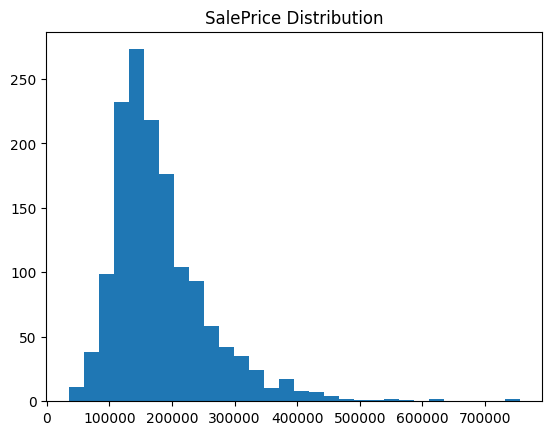

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Kaggle/house-prices/dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/house-prices/dataset/test.csv')

print(train_df.shape)
# train_df.head()
train_df.info()
train_df.describe()
plt.hist(train_df['SalePrice'], bins=30)
plt.title('SalePrice Distribution')
plt.show()

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## ✅ 2. Missing Values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


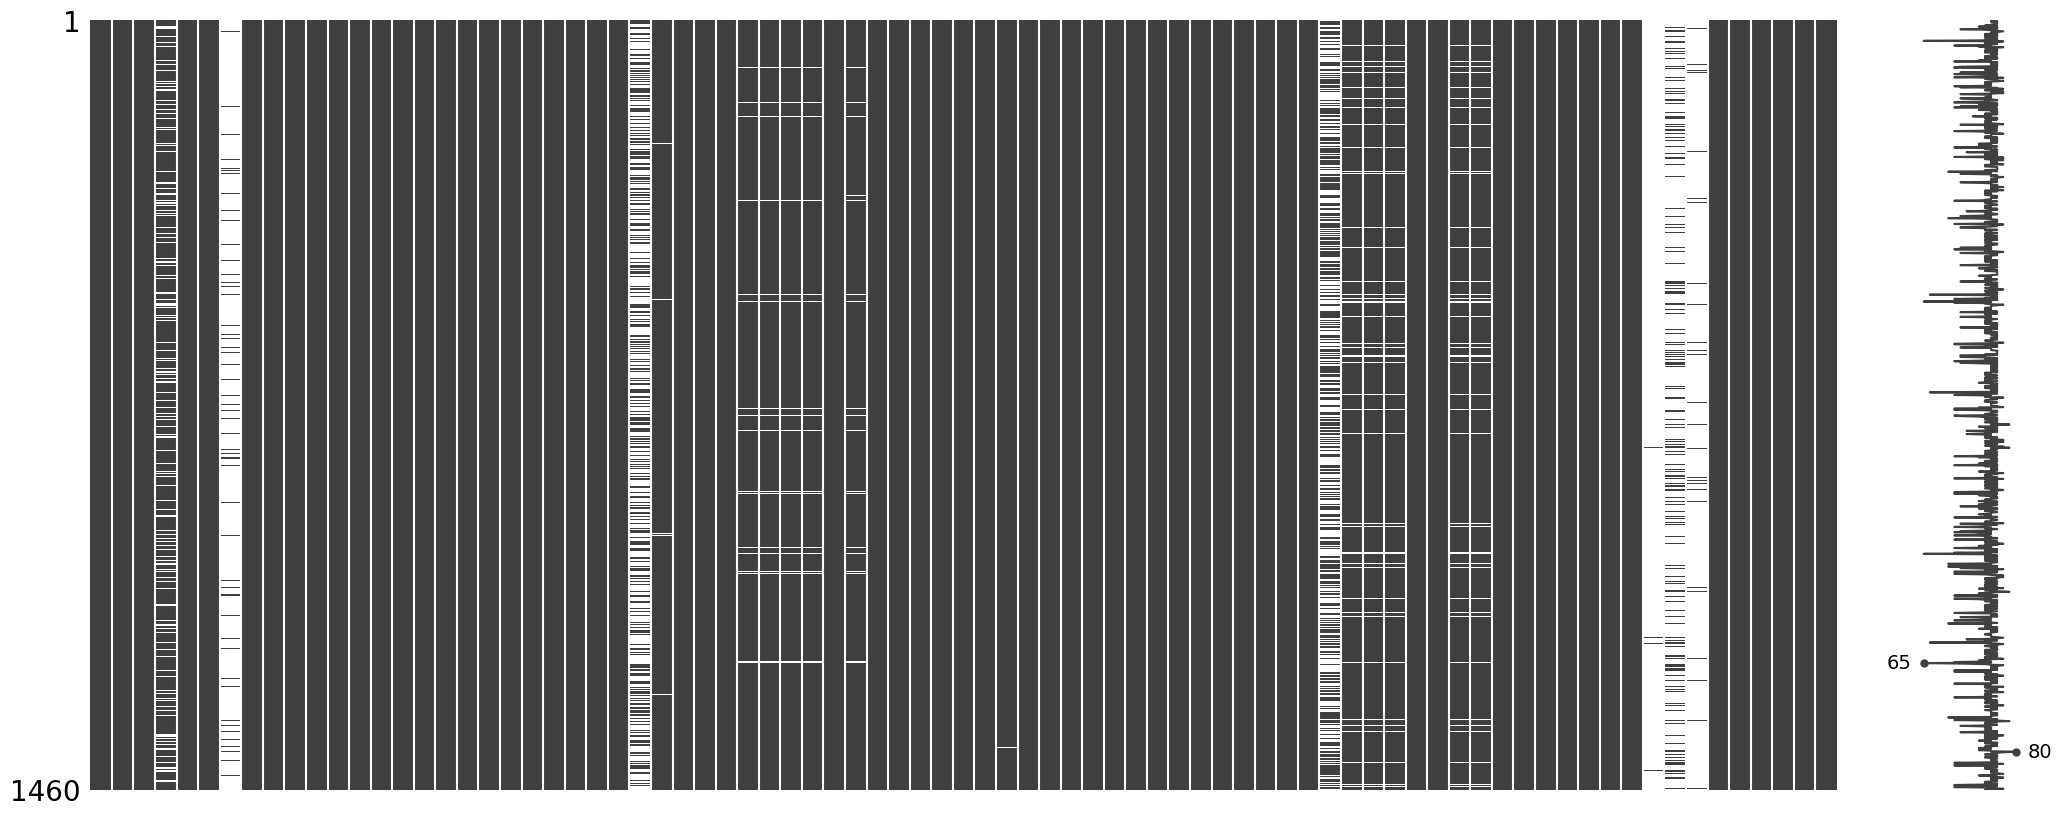

In [ ]:
import missingno as msno

msno.matrix(train_df)
train_df.isnull().sum().sort_values(ascending=False).head(20)

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
def get_dominant_columns(df, threshold=0.9, exclude_binary=False):
    """
    Return columns where the most frequent value dominates,
    even if only one other category remains.
    Optionally exclude binary-like columns.
    """
    dominant_cols = []
    for col in df.columns:
        value_counts = df[col].value_counts(dropna=False, normalize=True)
        top_freq = value_counts.iloc[0]
        remaining_unique = value_counts.iloc[1:].index.tolist()
        n_unique = df[col].nunique(dropna=False)

        if top_freq >= threshold:
            if not (exclude_binary and n_unique == 2):
                dominant_cols.append({
                    'column': col,
                    'top_value': value_counts.index[0],
                    'top_freq': top_freq,
                    'n_unique': n_unique,
                    'remaining_unique_values': remaining_unique
                })
    return dominant_cols


In [ ]:
#fill missing data
train_df.isnull().sum().sort_values(ascending=False).head(15)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [ ]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageCond,78
GarageFinish,78


Fill na

In [ ]:
train_df['PoolQC'].fillna('None', inplace=True)
test_df['PoolQC'].fillna('None', inplace=True)

/tmp/ipython-input-831-4247754240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['PoolQC'].fillna('None', inplace=True)
/tmp/ipython-input-831-4247754240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
train_df['MiscFeature'].fillna('None', inplace=True)
test_df['MiscFeature'].fillna('None', inplace=True)

/tmp/ipython-input-832-1580877947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MiscFeature'].fillna('None', inplace=True)
/tmp/ipython-input-832-1580877947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
train_df['Alley'].fillna('None', inplace=True)
test_df['Alley'].fillna('None', inplace=True)

/tmp/ipython-input-833-4054899209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('None', inplace=True)
/tmp/ipython-input-833-4054899209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
train_df['Fence'].fillna('None', inplace=True)
test_df['Fence'].fillna('None', inplace=True)

/tmp/ipython-input-834-2667676550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('None', inplace=True)
/tmp/ipython-input-834-2667676550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
train_df['MasVnrType'].fillna('None', inplace=True)
test_df['MasVnrType'].fillna('None', inplace=True)

/tmp/ipython-input-835-910386379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('None', inplace=True)
/tmp/ipython-input-835-910386379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
train_df['FireplaceQu'].fillna('None', inplace=True)
test_df['FireplaceQu'].fillna('None', inplace=True)

/tmp/ipython-input-836-2703957072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('None', inplace=True)
/tmp/ipython-input-836-2703957072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### Fill missing value: LotFrontage

Fill missing value of LotFrontage with median of the same Neighborhood

In [ ]:
train_df.groupby('Neighborhood')['LotFrontage'].std() / train_df.groupby('Neighborhood')['LotFrontage'].mean()

,LotFrontage
Neighborhood,
Blmngtn,0.105851
Blueste,0.000000
BrDale,0.056085
BrkSide,0.270015
ClearCr,0.226153
CollgCr,0.228219
Crawfor,0.270679
Edwards,0.475418
Gilbert,0.409980


In [ ]:
train_df.groupby('Neighborhood')['LotFrontage'].median()

,LotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,52.0
ClearCr,80.0
CollgCr,70.0
Crawfor,74.0
Edwards,65.5
Gilbert,65.0


In [ ]:
# Step 1: Compute median LotFrontage per Neighborhood from train_df
lotfrontage_median_by_neigh = train_df.groupby("Neighborhood")["LotFrontage"].median()

# Step 2: Fill train_df LotFrontage
train_df["LotFrontage"] = train_df.apply(
    lambda row: lotfrontage_median_by_neigh[row["Neighborhood"]] if pd.isnull(row["LotFrontage"]) else row["LotFrontage"],
    axis=1
)

# Step 3: Fill test_df LotFrontage using the same medians
test_df["LotFrontage"] = test_df.apply(
    lambda row: lotfrontage_median_by_neigh[row["Neighborhood"]] if pd.isnull(row["LotFrontage"]) else row["LotFrontage"],
    axis=1
)


In [ ]:
train_df['LotFrontage'].isna().sum()

np.int64(0)

In [ ]:
test_df['LotFrontage'].isna().sum()

np.int64(0)

### Fill missing garage-related
GarageCond,
GarageFinish,
GarageYrBlt,
GarageQual,
GarageType

train data: no missing val, only no garage, missing rows are the same index

test data: no garage and 2 missing val of [GarageCond,
GarageFinish,
GarageYrBlt,
GarageQual,]



In [ ]:
test_df['YrSold'].value_counts()

,count
YrSold,
2007,363
2008,318
2009,309
2006,305
2010,164


### Fix error value in GarageYrBlt in test_df

In [ ]:
test_df.loc[test_df['GarageYrBlt'] > 2100, ['GarageYrBlt', 'YrSold']]

,GarageYrBlt,YrSold
1132,2207.0,2007


In [ ]:
train_df.loc[train_df['YrSold'] == 2007, 'GarageYrBlt'].mode()

,GarageYrBlt
0,2007.0


In [ ]:
test_df.loc[test_df['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [ ]:
no_garage_mask = (train_df['GarageType'].isna())
train_df.loc[no_garage_mask, 'GarageFinish'] = 'None'
train_df.loc[no_garage_mask, 'GarageYrBlt'] = 0
train_df.loc[no_garage_mask, 'GarageQual'] = 'None'


In [ ]:
train_df['GarageFinish'].isna().sum()

np.int64(0)

In [ ]:
train_df['GarageQual'].isna().sum()

np.int64(0)

In [ ]:
no_garage_mask_test = (test_df['GarageType'].isnull())

In [ ]:
no_garage_mask_test = (test_df['GarageType'].isnull())
test_df.loc[no_garage_mask_test, 'GarageCond'] = 'None'
test_df.loc[no_garage_mask_test, 'GarageFinish'] = 'None'
test_df.loc[no_garage_mask_test, 'GarageYrBlt'] = 0
test_df.loc[no_garage_mask_test, 'GarageQual'] = 'None'

fill test missing val with mode

In [ ]:
test_df['GarageType'].fillna(train_df['GarageType'].mode()[0], inplace=True)

/tmp/ipython-input-851-4267919072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageType'].fillna(train_df['GarageType'].mode()[0], inplace=True)


In [ ]:
test_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0], inplace=True)

/tmp/ipython-input-852-2660823820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0], inplace=True)


In [ ]:
test_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0], inplace=True)

/tmp/ipython-input-853-1110150610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0], inplace=True)


In [ ]:
test_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0], inplace=True)

/tmp/ipython-input-854-3421048100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0], inplace=True)


In [ ]:
test_df.loc[test_df['GarageYrBlt'].isna(), :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,None,Detchd,NaN,Unf,1.0,360.0,TA,TA,Y,64,0,180,0,0,0,None,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,NaN,Unf,NaN,NaN,TA,TA,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca


In [ ]:
test_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)

/tmp/ipython-input-856-1507424060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)


In [ ]:
train_df['GarageAge'] = 0
train_df.loc[train_df['GarageYrBlt'] != 0,'GarageAge'] = train_df['YrSold'] - train_df['GarageYrBlt']

In [ ]:
test_df['GarageAge'] = 0
test_df.loc[test_df['GarageYrBlt'] != 0,'GarageAge'] = test_df['YrSold'] - test_df['GarageYrBlt']

In [ ]:
train_df.loc[train_df['GarageAge'].isna(), 'GarageYrBlt']

,GarageYrBlt


In [ ]:
# fix where GarageAge < 0
test_df.loc[test_df['GarageAge'] < 0, ['GarageYrBlt', 'YrSold']]

,GarageYrBlt,YrSold
1089,2008.0,2007


In [ ]:
test_df.loc[test_df['GarageAge'] < 0, 'GarageAge'] = 0

In [ ]:
test_df['GarageAge'].value_counts()

,count
GarageAge,
0,144
1,105
2,47
5,39
4,36
6,35
11,34
7,31
9,28


In [ ]:
train_df.drop('GarageYrBlt', axis=1, inplace=True)
test_df.drop('GarageYrBlt', axis=1, inplace=True)

### Filling Basement

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF


In [ ]:
train_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isna().sum()

,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinSF1,0
BsmtFinType2,38
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


In [ ]:
test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isna().sum()

,0
BsmtQual,44
BsmtCond,45
BsmtExposure,44
BsmtFinType1,42
BsmtFinSF1,1
BsmtFinType2,42
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1


In [ ]:
train_df['BsmtCond'].isna().sum()

np.int64(37)

In [ ]:
no_basement_mask = (train_df['BsmtQual'].isnull())
train_df.loc[no_basement_mask, 'BsmtQual'] = 'None'
train_df.loc[no_basement_mask, 'BsmtCond'] = 'None'
train_df.loc[no_basement_mask, 'BsmtExposure'] = 'None'
train_df.loc[no_basement_mask, 'BsmtFinType1'] = 'None'
train_df.loc[no_basement_mask, 'BsmtFinType2'] = 'None'

no_basement2_mask = (train_df['BsmtFinType2'].isna())
train_df.loc[no_basement2_mask, 'BsmtFinType2'] = 'None'

no_basement3_mask = (train_df['BsmtExposure'].isna())
train_df.loc[no_basement3_mask, 'BsmtExposure'] = 'None'

In [ ]:
train_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isna().sum()

,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinSF1,0
BsmtFinType2,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


In [ ]:
no_basement_mask_test = (test_df['BsmtQual'].isnull())
test_df.loc[no_basement_mask_test, 'BsmtQual'] = 'None'
test_df.loc[no_basement_mask_test, 'BsmtCond'] = 'None'
test_df.loc[no_basement_mask_test, 'BsmtExposure'] = 'None'
test_df.loc[no_basement_mask_test, 'BsmtFinType1'] = 'None'
test_df.loc[no_basement_mask_test, 'BsmtFinSF1'] = 0
test_df.loc[no_basement_mask_test, 'BsmtFinType2'] = 'None'
test_df.loc[no_basement_mask_test, 'BsmtFinSF2'] = 0
test_df.loc[no_basement_mask_test, 'BsmtUnfSF'] = 0
test_df.loc[no_basement_mask_test, 'TotalBsmtSF'] = 0

In [ ]:
test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isna().sum()

,0
BsmtQual,0
BsmtCond,3
BsmtExposure,2
BsmtFinType1,0
BsmtFinSF1,0
BsmtFinType2,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


In [ ]:
test_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0], inplace=True)
test_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0], inplace=True)

/tmp/ipython-input-871-795600189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0], inplace=True)
/tmp/ipython-input-871-795600189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isna().sum()

,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinSF1,0
BsmtFinType2,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


### Fill na MasVnrArea

In [ ]:
train_df['MasVnrArea'].value_counts()

,count
MasVnrArea,
0.0,861
108.0,8
72.0,8
180.0,8
16.0,7
120.0,7
340.0,6
200.0,6
80.0,6


In [ ]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

/tmp/ipython-input-874-3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipython-input-874-3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
train_df['MasVnrArea'].isna().sum()

np.int64(0)

### Fill na Electrical

In [ ]:
train_df['Electrical'].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
test_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

/tmp/ipython-input-877-3463411327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
/tmp/ipython-input-877-3463411327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

### Fill na MSZoning

In [ ]:
test_df['MSZoning'].value_counts()

,count
MSZoning,
RL,1114
RM,242
FV,74
C (all),15
RH,10


In [ ]:
test_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0], inplace=True)

/tmp/ipython-input-879-2509562140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0], inplace=True)


### Fill na BsmtFullBath, BsmtHalfBath

In [ ]:
test_df.loc[test_df['BsmtFullBath'].isna(), 'BsmtQual']

,BsmtQual
660,None
728,None


In [ ]:
test_df['BsmtFullBath'].value_counts()

,count
BsmtFullBath,
0.0,849
1.0,584
2.0,23
3.0,1


In [ ]:
test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)

/tmp/ipython-input-882-380667918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['BsmtFullBath'].fillna(0, inplace=True)
/tmp/ipython-input-882-380667918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Drop Utilities

In [ ]:
train_df['Utilities'].value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


In [ ]:
train_df.drop('Utilities', axis=1, inplace=True)
test_df.drop('Utilities', axis=1, inplace=True)

### Fill na Functional

In [ ]:
test_df['Functional'].value_counts()

,count
Functional,
Typ,1357
Min2,36
Min1,34
Mod,20
Maj1,5
Maj2,4
Sev,1


In [ ]:
test_df['Functional'].fillna(train_df['Functional'].mode()[0], inplace=True)

/tmp/ipython-input-886-2233247296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Functional'].fillna(train_df['Functional'].mode()[0], inplace=True)


### Fill na SaleType

In [ ]:
test_df['SaleType'].value_counts()

,count
SaleType,
WD,1258
New,117
COD,44
ConLD,17
CWD,8
Oth,4
ConLI,4
ConLw,3
Con,3


In [ ]:
test_df['SaleType'].fillna(train_df['SaleType'].mode()[0], inplace=True)

/tmp/ipython-input-888-1103445225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['SaleType'].fillna(train_df['SaleType'].mode()[0], inplace=True)


### Fill na KitechnQual

In [ ]:
test_df['KitchenQual'].isna().sum()

np.int64(1)

In [ ]:
test_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0], inplace=True)

/tmp/ipython-input-890-3494769540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0], inplace=True)


### Fill na Exterior2nd

In [ ]:
test_df['Exterior2nd'].value_counts()

,count
Exterior2nd,
VinylSd,510
MetalSd,233
HdBoard,199
Wd Sdng,194
Plywood,128
CmentBd,66
Wd Shng,43
BrkFace,22
Stucco,21


In [ ]:
test_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0], inplace=True)

/tmp/ipython-input-892-3084521890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0], inplace=True)


In [ ]:
test_df['Exterior2nd'].isna().sum()

np.int64(0)

### Fill na Exterior1st

In [ ]:
test_df['Exterior1st'].value_counts()

,count
Exterior1st,
VinylSd,510
MetalSd,230
HdBoard,220
Wd Sdng,205
Plywood,113
CemntBd,65
BrkFace,37
WdShing,30
AsbShng,24


In [ ]:
test_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0], inplace=True)

/tmp/ipython-input-895-1725837706.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0], inplace=True)


In [ ]:
test_df['Exterior1st'].isna().sum()

np.int64(0)

### Fill na GarageArea, GarageCars

In [ ]:
test_df['GarageArea'].isna().sum()

np.int64(1)

In [ ]:
test_df['GarageCars'].isna().sum()

np.int64(1)

In [ ]:
test_df['GarageArea'].value_counts()

,count
GarageArea,
0.0,76
576.0,50
440.0,47
484.0,34
400.0,33
528.0,32
240.0,31
480.0,30
308.0,28


In [ ]:
test_df.loc[test_df['GarageArea'].isna(), 'GarageCars']

,GarageCars
1116,NaN


In [ ]:
test_df['GarageCars'].value_counts()

,count
GarageCars,
2.0,770
1.0,407
3.0,193
0.0,76
4.0,11
5.0,1


In [ ]:
test_df['GarageArea'].fillna(0, inplace=True)
test_df['GarageCars'].fillna(0, inplace=True)

/tmp/ipython-input-902-2001206453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['GarageArea'].fillna(0, inplace=True)
/tmp/ipython-input-902-2001206453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
train_df['GarageCond'].value_counts()

,count
GarageCond,
TA,1326
Fa,35
Gd,9
Po,7
Ex,2


In [ ]:
train_df['GarageType'].value_counts()

,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


In [ ]:
train_df['GarageType'].fillna('None', inplace=True)
train_df['GarageCond'].fillna('None', inplace=True)

/tmp/ipython-input-905-2325440389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('None', inplace=True)
/tmp/ipython-input-905-2325440389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
LotConfig,0


In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_df[cat_cols].nunique().sort_values()
train_df[num_cols].nunique().sort_values()

,0
HalfBath,3
BsmtHalfBath,3
BsmtFullBath,4
FullBath,4
Fireplaces,4
KitchenAbvGr,4
GarageCars,5
YrSold,5
PoolArea,8
BedroomAbvGr,8


In [ ]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
LotConfig,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
train_df.drop('Id', axis=1, inplace=True)

In [ ]:
train_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_clean.pkl")
test_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_clean.pkl")


## ✅ 4. Skew & Transformation

In [ ]:

train_df = pd.read_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_clean.pkl")
test_df = pd.read_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_clean.pkl")


### drop bsmtSF, keep only TotalBsmtSF

In [ ]:
train_df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)
test_df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)


### combine all porch area to TotalPorchSF

In [ ]:
# combine all porch area and log1p

porch_cols = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# Sum all porch areas
train_df['TotalPorchSF'] = train_df[porch_cols].sum(axis=1)
test_df['TotalPorchSF'] = test_df[porch_cols].sum(axis=1)


In [ ]:
train_df.drop(columns=porch_cols, inplace=True)
test_df.drop(columns=porch_cols, inplace=True)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge,TotalPorchSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,61
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,31,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,42
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,8,307
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,8,84


### drop TotRmsAbvGrd

In [ ]:
train_df.drop(columns=['TotRmsAbvGrd'], inplace=True)
test_df.drop(columns=['TotRmsAbvGrd'], inplace=True)

#### drop GrLivArea: it is 1stFlrSF + 2ndFlrSF

In [ ]:
train_df.drop(columns=['GrLivArea'], inplace=True)
test_df.drop(columns=['GrLivArea'], inplace=True)

### drop GarageCars, GarageArea is enough

In [ ]:
train_df.drop(columns=['GarageCars'], inplace=True)
test_df.drop(columns=['GarageCars'], inplace=True)

### MSSubClass

In [ ]:
train_df['MSSubClass'].value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [ ]:
group = {
  20: '1-story',
  30: '1-story',
  40: '1-story',
  45: '1-1/2 story',
  50: '1-1/2 story',
  60: '2-story',
  70: '2-story',
  75: '2-story',
  80: 'split',
  85: 'split',
  90: 'duplex',
  120: '1-story',
  150: '1-1/2 story',
  160: '2-story',
  180: 'split',
  190: 'family',
}
train_df['MSSubClass'] = train_df['MSSubClass'].replace(group)

test_df['MSSubClass'] = test_df['MSSubClass'].replace(group)

In [ ]:
train_df['MSSubClass'].value_counts()

,count
MSSubClass,
1-story,696
2-story,438
1-1/2 story,156
split,88
duplex,52
family,30


### MSZoning
group RH, C (all) into Rare

In [ ]:
train_df['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [ ]:
train_df['MSZoning'] = train_df['MSZoning'].replace({
    'RH': 'Rare',
    'C (all)': 'Rare'
})

test_df['MSZoning'] = test_df['MSZoning'].replace({
    'RH': 'Rare',
    'C (all)': 'Rare'
})


In [ ]:
train_df['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
Rare,26


### LotShape
group IR2 + IR3 = Rare


In [ ]:
train_df['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [ ]:
train_df['LotShape'] = train_df['LotShape'].replace({
    'IR2': 'Rare',
    'IR3': 'Rare'
})

test_df['LotShape'] = test_df['LotShape'].replace({
    'IR2': 'Rare',
    'IR3': 'Rare'
})

In [ ]:
train_df['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
Rare,51


### LotConfig
FR2 FR3 -> Rare

In [ ]:
train_df['LotConfig'].value_counts()

,count
LotConfig,
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


In [ ]:
train_df['LotConfig'] = train_df['LotConfig'].replace({
    'FR2': 'Rare',
    'FR3': 'Rare'
})

test_df['LotConfig'] = test_df['LotConfig'].replace({
    'FR2': 'Rare',
    'FR3': 'Rare'
})

In [ ]:
test_df['LotConfig'].value_counts()

,count
LotConfig,
Inside,1081
Corner,248
CulDSac,82
Rare,48


### LandSlope
Mod + Sev = Rare

In [ ]:
train_df['LandSlope'].value_counts()

,count
LandSlope,
Gtl,1382
Mod,65
Sev,13


In [ ]:
train_df['LandSlope'] = train_df['LandSlope'].replace({
    'Mod': 'Rare',
    'Sev': 'Rare'
})

test_df['LandSlope'] = test_df['LandSlope'].replace({
    'Mod': 'Rare',
    'Sev': 'Rare'
})

### Neighborhood

rare_high,
rare_low



In [ ]:
train_df['Neighborhood'].value_counts()

,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


In [ ]:
neigh_stats = train_df.groupby('Neighborhood')['SalePrice'].agg(['count', 'median', 'mean']).sort_values('count')
print(neigh_stats)


              count    median           mean
Neighborhood                                
Blueste           2  137500.0  137500.000000
NPkVill           9  146000.0  142694.444444
Veenker          11  218000.0  238772.727273
BrDale           16  106000.0  104493.750000
MeadowV          17   88000.0   98576.470588
Blmngtn          17  191000.0  194870.882353
SWISU            25  139500.0  142591.360000
StoneBr          25  278000.0  310499.000000
ClearCr          28  200250.0  212565.428571
IDOTRR           37  103000.0  100123.783784
Timber           38  228475.0  242247.447368
NoRidge          41  301500.0  335295.317073
Mitchel          49  153500.0  156270.122449
Crawfor          51  200624.0  210624.725490
BrkSide          58  124300.0  124834.051724
SawyerW          59  179900.0  186555.796610
NWAmes           73  182900.0  189050.068493
Sawyer           74  135000.0  136793.135135
NridgHt          77  315000.0  316270.623377
Gilbert          79  181000.0  192854.506329
Somerst   

In [ ]:
group_n = {
  'Blueste': 'Rare_low',
  'NPkVill': 'Rare_low',
  'Veenker': 'Rare_high',
  'BrDale': 'Rare_low',
  'MeadowV': 'Rare_low',
  'Blmngtn': 'Rare_high',
  'SWISU': 'Rare_low',

}
train_df['Neighborhood'] = train_df['Neighborhood'].replace(group_n)

test_df['Neighborhood'] = test_df['Neighborhood'].replace(group_n)

In [ ]:
train_df['Neighborhood'].value_counts()

,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


### Condition1
Rare_RR,
Rare_Pos,


In [ ]:
train_df['Condition1'].value_counts()

,count
Condition1,
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


In [ ]:
group_c = {
  'RRAn': 'Rare_RR',
  'PosN': 'Rare_Pos',
  'RRAe': 'Rare_RR',
  'PosA': 'Rare_Pos',
  'RRNn': 'Rare_RR',
  'RRNe': 'Rare_RR',

}
train_df['Condition1'] = train_df['Condition1'].replace(group_c)

test_df['Condition1'] = test_df['Condition1'].replace(group_c)

In [ ]:
train_df['Condition1'].value_counts()

,count
Condition1,
Norm,1260
Feedr,81
Artery,48
Rare_RR,44
Rare_Pos,27


#### Condition2

In [ ]:
train_df['Condition2'].value_counts()

,count
Condition2,
Norm,1445
Feedr,6
Artery,2
RRNn,2
PosN,2
PosA,1
RRAn,1
RRAe,1


In [ ]:
# drop Condition2
train_df.drop('Condition2', axis=1, inplace=True)
test_df.drop('Condition2', axis=1, inplace=True)

### HouseStyle
group 1.5 or more -> Rare

In [ ]:
train_df['HouseStyle'].value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


In [ ]:
group_h = {
  '1.5Unf': 'Rare',
  '2.5Unf': 'Rare',
  '2.5Fin': 'Rare',
}
train_df['HouseStyle'] = train_df['HouseStyle'].replace(group_h)

test_df['HouseStyle'] = test_df['HouseStyle'].replace(group_h)

In [ ]:
train_df['HouseStyle'].value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
Rare,33


### OverallQual
group >= 9,
group <= 3

In [ ]:
train_df['OverallQual'].value_counts()

,count
OverallQual,
5,397
6,374
7,319
8,168
4,116
9,43
3,20
10,18
2,3


In [ ]:
group_o = {
  10: 9,
  2: 3,
  1: 3,
}
train_df['OverallQual'] = train_df['OverallQual'].replace(group_o)

test_df['OverallQual'] = test_df['OverallQual'].replace(group_o)

In [ ]:
train_df['OverallQual'].value_counts()

,count
OverallQual,
5,397
6,374
7,319
8,168
4,116
9,61
3,25


### OverallCond

group >=8
group <= 3

In [ ]:
train_df['OverallCond'].value_counts()

,count
OverallCond,
5,821
6,252
7,205
8,72
4,57
3,25
9,22
2,5
1,1


In [ ]:
group_o2 = {
  1: 3,
  2: 3,
  9: 8,
}
train_df['OverallCond'] = train_df['OverallCond'].replace(group_o2)

test_df['OverallCond'] = test_df['OverallCond'].replace(group_o2)

In [ ]:
train_df['OverallCond'].value_counts()

,count
OverallCond,
5,821
6,252
7,205
8,94
4,57
3,31


### YearBuilt - YrSold

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge,TotalPorchSF
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,61
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,31,0
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,42
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,8,307
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,8,84


In [ ]:
train_df['YearBuilt'].value_counts()

,count
YearBuilt,
2006,67
2005,64
2004,54
2007,49
2003,45
1976,33
1977,32
1920,30
1959,26


In [ ]:
train_df['Age'] = (train_df['YrSold']-train_df['YearBuilt']).clip(lower=0)
test_df['Age'] = (test_df['YrSold']-test_df['YearBuilt']).clip(lower=0)

In [ ]:
bins = [-1, 0, 5, 10, 20, 30, 50, 70, 90, 150]
labels = ['0', '0-5', '5-10', '10-20', '20-30', '30-50', '50-70', '70-90', '90-150']

In [ ]:
train_df['Age_group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
test_df['Age_group'] = pd.cut(test_df['Age'], bins=bins, labels=labels)


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAge,TotalPorchSF,Age,Age_group
0,1461,1-story,Rare,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,Typ,0,None,Attchd,Unf,730.0,TA,TA,Y,140,0,None,MnPrv,None,0,6,2010,WD,Normal,49,120,49,30-50
1,1462,1-story,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,Typ,0,None,Attchd,Unf,312.0,TA,TA,Y,393,0,None,None,Gar2,12500,6,2010,WD,Normal,52,36,52,50-70
2,1463,2-story,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,Typ,1,TA,Attchd,Fin,482.0,TA,TA,Y,212,0,None,MnPrv,None,0,3,2010,WD,Normal,13,34,13,10-20
3,1464,2-story,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,926.0,GasA,Ex,Y,SBrkr,926,678,0,0.0,0.0,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,470.0,TA,TA,Y,360,0,None,None,None,0,6,2010,WD,Normal,12,36,12,10-20
4,1465,1-story,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,0.0,0.0,2,0,2,1,Gd,Typ,0,None,Attchd,RFn,506.0,TA,TA,Y,0,0,None,None,None,0,1,2010,WD,Normal,18,226,18,10-20


In [ ]:
train_df['Age_group'] = train_df['Age_group'].cat.codes
test_df['Age_group'] = test_df['Age_group'].cat.codes

In [ ]:
train_df['Age_group'].value_counts()

,count
Age_group,
5,379
1,246
6,218
7,144
3,130
2,124
4,78
8,77
0,64


In [ ]:
train_df.drop('Age', axis=1, inplace=True)
test_df.drop('Age', axis=1, inplace=True)

In [ ]:
train_df['RemodAge'] = (train_df['YrSold']-train_df['YearRemodAdd']).clip(lower=0)
test_df['RemodAge'] = (test_df['YrSold']-test_df['YearRemodAdd']).clip(lower=0)

In [ ]:
train_df['RemodAgeGroup'] = pd.cut(train_df['RemodAge'], bins=bins, labels=labels)
test_df['RemodAgeGroup'] = pd.cut(test_df['RemodAge'], bins=bins, labels=labels)


In [ ]:
train_df['RemodAgeGroup'] = train_df['RemodAgeGroup'].cat.codes
test_df['RemodAgeGroup'] = test_df['RemodAgeGroup'].cat.codes

In [ ]:
train_df.drop('RemodAge', axis=1, inplace=True)
test_df.drop('RemodAge', axis=1, inplace=True)

In [ ]:
train_df['RemodAgeGroup'].value_counts()

,count
RemodAgeGroup,
5,305
1,301
6,244
2,196
3,196
0,125
4,93


In [ ]:
# apply bin to GarageAge as well

train_df['GarageAgeGroup'] = pd.cut(train_df['GarageAge'], bins=bins, labels=labels)
test_df['GarageAgeGroup'] = pd.cut(test_df['GarageAge'], bins=bins, labels=labels)


In [ ]:
train_df['GarageAgeGroup'] = train_df['GarageAgeGroup'].cat.codes
test_df['GarageAgeGroup'] = test_df['GarageAgeGroup'].cat.codes

In [ ]:

train_df.drop('YearRemodAdd', axis=1, inplace=True)
test_df.drop('YearRemodAdd', axis=1, inplace=True)
train_df  .drop('YearBuilt', axis=1, inplace=True)
test_df.drop('YearBuilt', axis=1, inplace=True)

train_df.drop('GarageAge', axis=1, inplace=True)
test_df.drop('GarageAge', axis=1, inplace=True)

In [ ]:
train_df['RoofStyle'].value_counts()

,count
RoofStyle,
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


In [ ]:
train_df['RoofMatl'].value_counts()

,count
RoofMatl,
CompShg,1434
Tar&Grv,11
WdShngl,6
WdShake,5
Metal,1
Membran,1
Roll,1
ClyTile,1


In [ ]:
group_r = {
  'Flat': 'Rare',
  'Gambrel': 'Rare',
  'Mansard': 'Rare',
  'Shed': 'Rare',
}
train_df['RoofStyle'] = train_df['RoofStyle'].replace(group_r)

test_df['RoofStyle'] = test_df['RoofStyle'].replace(group_r)

In [ ]:
group_r2 = {
  'Tar&Grv': 'Rare',
  'WdShngl': 'Rare',
  'WdShake': 'Rare',
  'Metal': 'Rare',
  'Membran': 'Rare',
  'Roll': 'Rare',
  'ClyTile': 'Rare',
}
train_df['RoofMatl'] = train_df['RoofMatl'].replace(group_r2)

test_df['RoofMatl'] = test_df['RoofMatl'].replace(group_r2)

In [ ]:
train_df['RoofStyle'].value_counts()

,count
RoofStyle,
Gable,1141
Hip,286
Rare,33


In [ ]:
train_df['RoofMatl'].value_counts()

,count
RoofMatl,
CompShg,1434
Rare,26


In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['Exterior1st'].value_counts()

,count
Exterior1st,
VinylSd,515
HdBoard,222
MetalSd,220
Wd Sdng,206
Plywood,108
CemntBd,61
BrkFace,50
WdShing,26
Stucco,25


In [ ]:
group_e1 = {
  'WdShing': 'Rare',
  'Stucco': 'Rare',
  'AsbShng': 'Rare',
  'BrkComm': 'Rare',
  'Stone': 'Rare',
  'AsphShn': 'Rare',
  'ImStucc': 'Rare',
  'CBlock': 'Rare',
}
train_df['Exterior1st'] = train_df['Exterior1st'].replace(group_e1)

test_df['Exterior1st'] = test_df['Exterior1st'].replace(group_e1)

In [ ]:
train_df['Exterior2nd'].value_counts()

,count
Exterior2nd,
VinylSd,504
MetalSd,214
HdBoard,207
Wd Sdng,197
Plywood,142
CmentBd,60
Wd Shng,38
Stucco,26
BrkFace,25


In [ ]:
group_e2 = {
  'Wd Shng': 'Rare',
  'Stucco': 'Rare',
  'AsbShng': 'Rare',
  'Brk Cmn': 'Rare',
  'Stone': 'Rare',
  'AsphShn': 'Rare',
  'ImStucc': 'Rare',
  'CBlock': 'Rare',
  'Other': 'Rare'
}
train_df['Exterior2nd'] = train_df['Exterior2nd'].replace(group_e2)

test_df['Exterior2nd'] = test_df['Exterior2nd'].replace(group_e2)

In [ ]:
train_df['Exterior2nd'].value_counts()

,count
Exterior2nd,
VinylSd,504
MetalSd,214
HdBoard,207
Wd Sdng,197
Plywood,142
Rare,111
CmentBd,60
BrkFace,25


In [ ]:
train_df['MasVnrType'].value_counts()

,count
MasVnrType,
None,872
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
group_m = {
  'Stone': 'Rare',
  'BrkCmn': 'Rare',
}
train_df['MasVnrType'] = train_df['MasVnrType'].replace(group_m)

test_df['MasVnrType'] = test_df['MasVnrType'].replace(group_m)

In [ ]:
train_df['ExterQual'].value_counts()

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [ ]:
group = {
  'Fa': 'TA',
}
train_df['ExterQual'] = train_df['ExterQual'].replace(group)

test_df['ExterQual'] = test_df['ExterQual'].replace(group)

In [ ]:
train_df['ExterCond'].value_counts()

,count
ExterCond,
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


In [ ]:
group = {
  'Po': 'Fa',
  'Ex': 'Gd',
}
train_df['ExterCond'] = train_df['ExterCond'].replace(group)

test_df['ExterCond'] = test_df['ExterCond'].replace(group)

In [ ]:
train_df['Foundation'].value_counts()

,count
Foundation,
PConc,647
CBlock,634
BrkTil,146
Slab,24
Stone,6
Wood,3


In [ ]:
group = {
  'Slab': 'Rare',
  'Stone': 'Rare',
  'Wood': 'Rare',
}
train_df['Foundation'] = train_df['Foundation'].replace(group)

test_df['Foundation'] = test_df['Foundation'].replace(group)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['BsmtCond'].value_counts()

,count
BsmtCond,
TA,1311
Gd,65
Fa,45
None,37
Po,2


In [ ]:
group = {
  'Po': 'Fa',
}
train_df['BsmtCond'] = train_df['BsmtCond'].replace(group)

test_df['BsmtCond'] = test_df['BsmtCond'].replace(group)

In [ ]:
train_df['BsmtFinType2'].value_counts()

,count
BsmtFinType2,
Unf,1256
Rec,54
LwQ,46
None,38
BLQ,33
ALQ,19
GLQ,14


In [ ]:
group = {
  'GLQ': 'ALQ',
}
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].replace(group)

test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace(group)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['Heating'].value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


In [ ]:
group = {
  'GasW': 'Rare',
  'Grav': 'Rare',
  'Wall': 'Rare',
  'OthW': 'Rare',
  'Floor': 'Rare',
}
train_df['Heating'] = train_df['Heating'].replace(group)

test_df['Heating'] = test_df['Heating'].replace(group)

In [ ]:
train_df['HeatingQC'].value_counts()

,count
HeatingQC,
Ex,741
TA,428
Gd,241
Fa,49
Po,1


In [ ]:
group = {
  'Po': 'Fa',
}
train_df['HeatingQC'] = train_df['HeatingQC'].replace(group)

test_df['HeatingQC'] = test_df['HeatingQC'].replace(group)

In [ ]:
train_df['Electrical'].value_counts()

,count
Electrical,
SBrkr,1335
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
group = {
  'FuseF': 'Rare',
  'FuseP': 'Rare',
  'Mix': 'Rare',
}
train_df['Electrical'] = train_df['Electrical'].replace(group)

test_df['Electrical'] = test_df['Electrical'].replace(group)

In [ ]:
train_df['BsmtFullBath'].value_counts()

,count
BsmtFullBath,
0,856
1,588
2,15
3,1


In [ ]:
group = {
  2: 1,
  3: 1,
}
train_df['BsmtFullBath'] = train_df['BsmtFullBath'].replace(group)

test_df['BsmtFullBath'] = test_df['BsmtFullBath'].replace(group)

In [ ]:
train_df['FullBath'].value_counts()

,count
FullBath,
2,768
1,650
3,33
0,9


In [ ]:
group = {
  0: 1,
}
train_df['FullBath'] = train_df['FullBath'].replace(group)

test_df['FullBath'] = test_df['FullBath'].replace(group)

In [ ]:
train_df['HalfBath'].value_counts()

,count
HalfBath,
0,913
1,535
2,12


In [ ]:
group = {
  2: 1,
}
train_df['HalfBath'] = train_df['HalfBath'].replace(group)

test_df['HalfBath'] = test_df['HalfBath'].replace(group)

In [ ]:
train_df['BsmtHalfBath'].value_counts()

,count
BsmtHalfBath,
0,1378
1,80
2,2


In [ ]:
group = {
  2: 1,
}
train_df['BsmtHalfBath'] = train_df['BsmtHalfBath'].replace(group)

test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].replace(group)

In [ ]:
train_df['BedroomAbvGr'].value_counts()

,count
BedroomAbvGr,
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


In [ ]:
group = {
  0: 1,
  6: 5,
  7: 5,
  8: 5
}
train_df['BedroomAbvGr'] = train_df['BedroomAbvGr'].replace(group)

test_df['BedroomAbvGr'] = test_df['BedroomAbvGr'].replace(group)

In [ ]:
train_df['Functional'].value_counts()

,count
Functional,
Typ,1360
Min2,34
Min1,31
Mod,15
Maj1,14
Maj2,5
Sev,1


In [ ]:
group = {
  'Mod': 'Rare',
  'Maj1': 'Rare',
  'Maj2': 'Rare',
  'Sev': 'Rare',
}
train_df['Functional'] = train_df['Functional'].replace(group)

test_df['Functional'] = test_df['Functional'].replace(group)

In [ ]:
train_df['Fireplaces'].value_counts()

,count
Fireplaces,
0,690
1,650
2,115
3,5


In [ ]:
group = {
  3: 2,
}
train_df['Fireplaces'] = train_df['Fireplaces'].replace(group)

test_df['Fireplaces'] = test_df['Fireplaces'].replace(group)

In [ ]:
train_df['FireplaceQu'].value_counts()

,count
FireplaceQu,
None,690
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [ ]:
group = {
  'Po': 'Fa',
  'Ex': 'Gd'
}
train_df['FireplaceQu'] = train_df['FireplaceQu'].replace(group)

test_df['FireplaceQu'] = test_df['FireplaceQu'].replace(group)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,0,None,None,None,0,2,2008,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,None,None,None,0,5,2007,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,None,None,None,0,9,2008,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,None,None,None,0,12,2008,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['GarageType'].value_counts()

,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
None,81
Basment,19
CarPort,9
2Types,6


In [ ]:
group = {
  'Basment': 'Rare',
  'CarPort': 'Rare',
  '2Types': 'Rare',
}
train_df['GarageType'] = train_df['GarageType'].replace(group)

test_df['GarageType'] = test_df['GarageType'].replace(group)

In [ ]:
train_df['GarageQual'].value_counts()

,count
GarageQual,
TA,1311
None,81
Fa,48
Gd,14
Ex,3
Po,3


In [ ]:
group = {
  'Gd': 'TA',
  'Ex': 'TA',
  'Po': 'Fa',
}
train_df['GarageQual'] = train_df['GarageQual'].replace(group)

test_df['GarageQual'] = test_df['GarageQual'].replace(group)

In [ ]:
train_df['GarageCond'].value_counts()

,count
GarageCond,
TA,1326
None,81
Fa,35
Gd,9
Po,7
Ex,2


In [ ]:
group = {
  'Gd': 'TA',
  'Ex': 'TA',
  'Po': 'Fa',
}
train_df['GarageCond'] = train_df['GarageCond'].replace(group)

test_df['GarageCond'] = test_df['GarageCond'].replace(group)

In [ ]:
train_df['PavedDrive'].value_counts()

,count
PavedDrive,
Y,1340
N,90
P,30


In [ ]:
train_df['PoolQC'].value_counts()

,count
PoolQC,
None,1453
Gd,3
Ex,2
Fa,2


In [ ]:
train_df.drop('PoolQC', axis=1, inplace=True)
test_df.drop('PoolQC', axis=1, inplace=True)

In [ ]:
train_df.drop('PoolArea', axis=1, inplace=True)
test_df.drop('PoolArea', axis=1, inplace=True)

In [ ]:
train_df['Fence'].value_counts()

,count
Fence,
None,1179
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [ ]:
group = {
  'MnWw': 'GdWo',
}
train_df['Fence'] = train_df['Fence'].replace(group)

test_df['Fence'] = test_df['Fence'].replace(group)

In [ ]:
train_df['MiscFeature'].value_counts()

,count
MiscFeature,
None,1406
Shed,49
Gar2,2
Othr,2
TenC,1


In [ ]:
group = {
  'Shed': 'Exist',
  'Gar2': 'Exist',
  'Othr': 'Exist',
  'TenC': 'Exist',
}
train_df['MiscFeature'] = train_df['MiscFeature'].replace(group)

test_df['MiscFeature'] = test_df['MiscFeature'].replace(group)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,None,None,0,2,2008,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,None,None,0,5,2007,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,None,None,0,9,2008,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,None,None,0,2,2006,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,None,None,0,12,2008,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['MoSold'].value_counts()

,count
MoSold,
6,253
7,234
5,204
4,141
8,122
3,106
10,89
11,79
9,63


In [ ]:
train_df.drop('MoSold', axis=1, inplace=True)
test_df.drop('MoSold', axis=1, inplace=True)

train_df.drop('YrSold', axis=1, inplace=True)
test_df.drop('YrSold', axis=1, inplace=True)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,None,None,0,WD,Normal,208500,61,1,1,1
1,1-story,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,None,None,0,WD,Normal,181500,0,5,5,5
2,2-story,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,None,None,0,WD,Normal,223500,42,2,2,2
3,2-story,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,None,None,0,WD,Abnorml,140000,307,8,5,2
4,2-story,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,None,None,0,WD,Normal,250000,84,2,2,2


In [ ]:
train_df['SaleType'].value_counts()

,count
SaleType,
WD,1267
New,122
COD,43
ConLD,9
ConLI,5
ConLw,5
CWD,4
Oth,3
Con,2


In [ ]:
group = {
  'CWD': 'WD',
  'ConLD': 'Rare',
  'ConLI': 'Rare',
  'ConLw': 'Rare',
  'Con': 'Rare',
  'Oth': 'Rare',
}
train_df['SaleType'] = train_df['SaleType'].replace(group)

test_df['SaleType'] = test_df['SaleType'].replace(group)

In [ ]:
train_df['SaleCondition'].value_counts()

,count
SaleCondition,
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [ ]:
group = {
  'Family': 'Rare',
  'Alloca': 'Rare',
  'AdjLand': 'Rare',
}
train_df['SaleCondition'] = train_df['SaleCondition'].replace(group)

test_df['SaleCondition'] = test_df['SaleCondition'].replace(group)

In [ ]:
dominant_columns = get_dominant_columns(train_df, threshold=0.95)
for d in dominant_columns:
    print(f"{d['column']}: {d['top_value']} = {d['top_freq']:.2%}, remaining: {d['remaining_unique_values']}")


Street: Pave = 99.59%, remaining: ['Grvl']
RoofMatl: CompShg = 98.22%, remaining: ['Rare']
Heating: GasA = 97.81%, remaining: ['Rare']
LowQualFinSF: 0 = 98.22%, remaining: [80, 360, 513, 528, 572, 144, 234, 392, 371, 420, 390, 473, 156, 515, 53, 232, 481, 120, 514, 397, 479, 205, 384]
KitchenAbvGr: 1 = 95.34%, remaining: [2, 3, 0]
MiscFeature: None = 96.30%, remaining: ['Exist']
MiscVal: 0 = 96.44%, remaining: [400, 500, 700, 450, 600, 2000, 1200, 480, 350, 15500, 800, 3500, 1300, 54, 620, 560, 1400, 8300, 1150, 2500]


In [ ]:
train_df['Street'].value_counts()

,count
Street,
Pave,1454
Grvl,6


In [ ]:
train_df.drop('Street', axis=1, inplace=True)
test_df.drop('Street', axis=1, inplace=True)

In [ ]:
train_df['KitchenAbvGr'].value_counts()

,count
KitchenAbvGr,
1,1392
2,65
3,2
0,1


In [ ]:
group = {
    2: '2+',
    3: '2+',
    0: 1
}

train_df['KitchenAbvGr'] = train_df['KitchenAbvGr'].replace(group)

test_df['KitchenAbvGr'] = test_df['KitchenAbvGr'].replace(group)

### Handle Numerical cols

In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# @title
from scipy.stats import skew
skewed_feats = train_df[num_cols].apply(lambda x: skew(x.dropna()))
high_skew = skewed_feats[abs(skewed_feats) > 0.75]
# for col in high_skew.index:
#     train_df[col] = np.log1p(train_df[col])

In [ ]:
# @title
high_skew

,0
LotFrontage,2.210685
LotArea,12.195142
MasVnrArea,2.674865
TotalBsmtSF,1.522688
1stFlrSF,1.375342
2ndFlrSF,0.812194
LowQualFinSF,9.002080
BsmtHalfBath,3.855436
WoodDeckSF,1.539792
MiscVal,24.451640


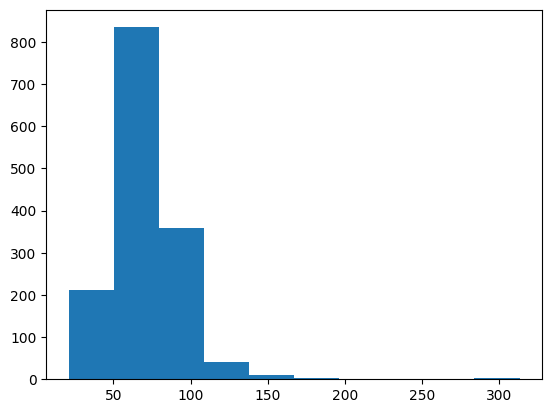

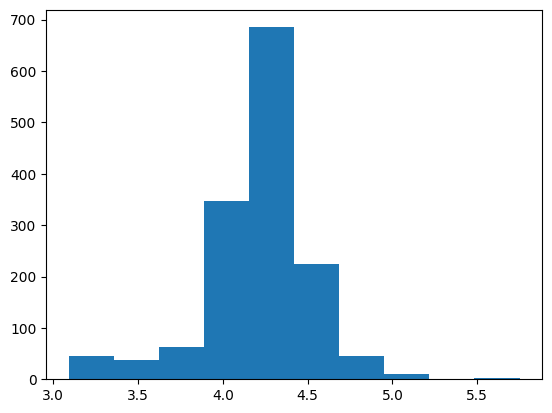

In [ ]:
plt.hist(train_df['LotFrontage'])
plt.show()

plt.hist(np.log1p(train_df['LotFrontage']))
plt.show()

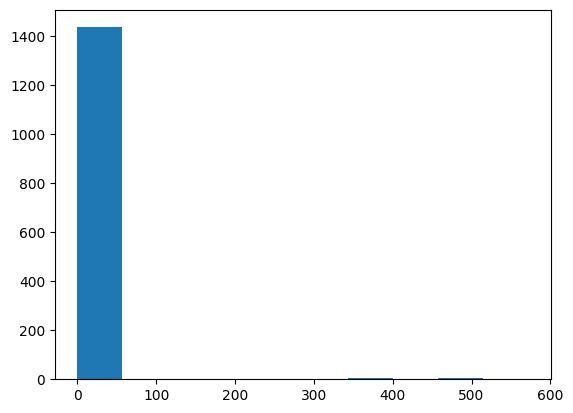

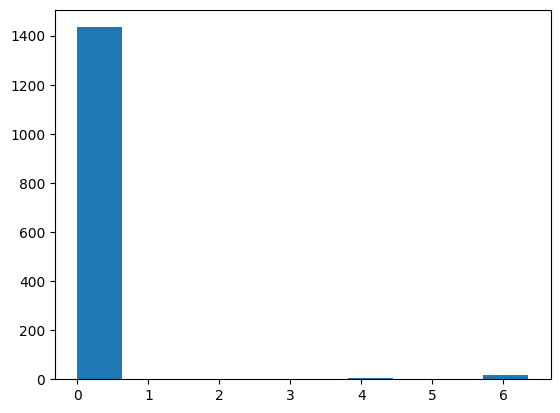

In [ ]:
plt.hist(train_df['LowQualFinSF'])
plt.show()

plt.hist(np.log1p(train_df['LowQualFinSF']))
plt.show()

In [ ]:
train_df.drop('LowQualFinSF', axis=1, inplace=True)
test_df.drop('LowQualFinSF', axis=1, inplace=True)

In [ ]:
convert_log_cols = ['LotFrontage','LotArea','MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'MiscVal', 'TotalPorchSF']

for col in convert_log_cols:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])


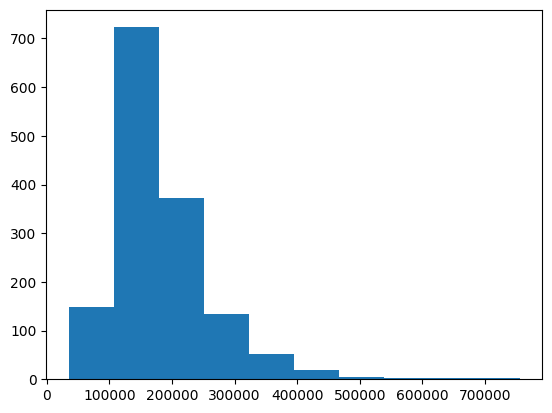

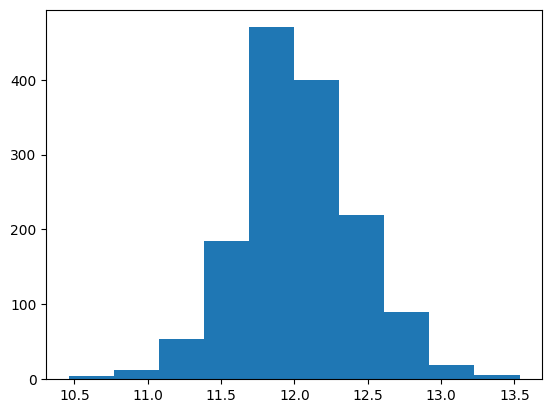

In [ ]:
plt.hist(train_df['SalePrice'])
plt.show()

plt.hist(np.log1p(train_df['SalePrice']))
plt.show()

In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,2-story,RL,4.189655,9.042040,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0.000000,None,None,0.0,WD,Normal,12.247699,4.127134,1,1,1
1,1-story,RL,4.394449,9.169623,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,5.700444,None,None,0.0,WD,Normal,12.109016,0.000000,5,5,5
2,2-story,RL,4.234107,9.328212,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0.000000,None,None,0.0,WD,Normal,12.317171,3.761200,2,2,2
3,2-story,RL,4.110874,9.164401,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0.000000,None,None,0.0,WD,Abnorml,11.849405,5.730100,8,5,2
4,2-story,RL,4.442651,9.565284,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,5.262690,None,None,0.0,WD,Normal,12.429220,4.442651,2,2,2


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup
0,1461,1-story,Rare,4.394449,9.360741,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,LwQ,6.783325,GasA,TA,Y,SBrkr,6.799056,0.000000,0.0,0.0,1,0,2,1,TA,Typ,0,None,Attchd,Unf,730.0,TA,TA,Y,4.948760,MnPrv,None,0.000000,WD,Normal,4.795791,5,5,5
1,1462,1-story,RL,4.406719,9.565775,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,Unf,7.192934,GasA,TA,Y,SBrkr,7.192934,0.000000,0.0,0.0,1,1,3,1,Gd,Typ,0,None,Attchd,Unf,312.0,TA,TA,Y,5.976351,None,Exist,9.433564,WD,Normal,3.610918,6,6,6
2,1463,2-story,RL,4.317488,9.534668,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,Unf,6.834109,GasA,Gd,Y,SBrkr,6.834109,6.553933,0.0,0.0,2,1,3,1,TA,Typ,1,TA,Attchd,Fin,482.0,TA,TA,Y,5.361292,MnPrv,None,0.000000,WD,Normal,3.555348,3,3,3
3,1464,2-story,RL,4.369448,9.208238,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.044522,TA,TA,PConc,TA,TA,No,GLQ,Unf,6.831954,GasA,Ex,Y,SBrkr,6.831954,6.520621,0.0,0.0,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,470.0,TA,TA,Y,5.888878,None,None,0.000000,WD,Normal,3.610918,3,3,3
4,1465,1-story,RL,3.784190,8.518392,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,7.155396,GasA,Ex,Y,SBrkr,7.155396,0.000000,0.0,0.0,2,0,2,1,Gd,Typ,0,None,Attchd,RFn,506.0,TA,TA,Y,0.000000,None,None,0.000000,WD,Normal,5.424950,3,3,3


## More transformation
columns that should have a boolean indicator feature ex. masvnrarea -> add indicator to seperate 0 or non zero

In [ ]:
import pandas as pd

def detect_separation_features(df, threshold=0.3):
    """
    Detect features where a single value (mode) dominates a large portion of data,
    indicating potential for a boolean indicator to separate that group.

    Args:
    - df: pandas DataFrame
    - threshold: minimum fraction of rows that must have the mode value to be considered

    Returns:
    - List of tuples: (feature_name, mode_value, mode_fraction)
    """
    candidates = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            mode_val = df[col].mode()
            if not mode_val.empty:
                mode_val = mode_val[0]
                frac = (df[col] == mode_val).mean()
                if frac >= threshold:
                    candidates.append((col, mode_val, frac))
    return candidates


In [ ]:
candidates = detect_separation_features(train_df, threshold=0.3)
for col, val, frac in candidates:
    print(f"Feature '{col}' has a dominant value {val} in {frac:.1%} of rows")


Feature 'OverallCond' has a dominant value 5 in 56.2% of rows
Feature 'MasVnrArea' has a dominant value 0.0 in 59.5% of rows
Feature '2ndFlrSF' has a dominant value 0.0 in 56.8% of rows
Feature 'BsmtFullBath' has a dominant value 0 in 58.6% of rows
Feature 'BsmtHalfBath' has a dominant value 0 in 94.4% of rows
Feature 'FullBath' has a dominant value 2 in 52.6% of rows
Feature 'HalfBath' has a dominant value 0 in 62.5% of rows
Feature 'BedroomAbvGr' has a dominant value 3 in 55.1% of rows
Feature 'Fireplaces' has a dominant value 0 in 47.3% of rows
Feature 'WoodDeckSF' has a dominant value 0.0 in 52.1% of rows
Feature 'MiscVal' has a dominant value 0.0 in 96.4% of rows
Feature 'TotalPorchSF' has a dominant value 0.0 in 31.4% of rows


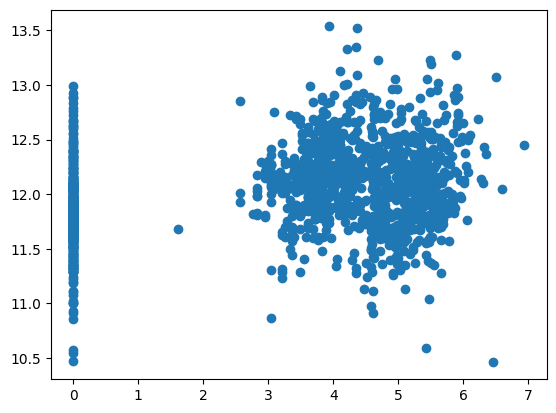

In [ ]:
plt.scatter(train_df['TotalPorchSF'], train_df['SalePrice'])
plt.show()

In [ ]:
train_df['MasVnrArea_exist'] = (train_df['MasVnrArea'] > 0).astype(int)
test_df['MasVnrArea_exist'] = (test_df['MasVnrArea'] > 0).astype(int)

In [ ]:
train_df['2ndFlrSF_exist'] = (train_df['2ndFlrSF'] > 0).astype(int)
test_df['2ndFlrSF_exist'] = (test_df['2ndFlrSF'] > 0).astype(int)

In [ ]:
train_df['WoodDeckSF_exist'] = (train_df['WoodDeckSF'] > 0).astype(int)
test_df['WoodDeckSF_exist'] = (test_df['WoodDeckSF'] > 0).astype(int)

In [ ]:
train_df['MiscVal_exist'] = (train_df['MiscVal'] > 0).astype(int)
test_df['MiscVal_exist'] = (test_df['MiscVal'] > 0).astype(int)

In [ ]:
train_df['TotalPorchSF_exist'] = (train_df['TotalPorchSF'] > 0).astype(int)
test_df['TotalPorchSF_exist'] = (test_df['TotalPorchSF'] > 0).astype(int)

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist
0,2-story,RL,4.189655,9.042040,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0.000000,None,None,0.0,WD,Normal,12.247699,4.127134,1,1,1,1,1,0,0,1
1,1-story,RL,4.394449,9.169623,None,Reg,Lvl,Rare,Gtl,Rare_high,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,5.700444,None,None,0.0,WD,Normal,12.109016,0.000000,5,5,5,0,0,1,0,0
2,2-story,RL,4.234107,9.328212,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0.000000,None,None,0.0,WD,Normal,12.317171,3.761200,2,2,2,1,1,0,0,1
3,2-story,RL,4.110874,9.164401,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0.000000,None,None,0.0,WD,Abnorml,11.849405,5.730100,8,5,2,0,1,0,0,1
4,2-story,RL,4.442651,9.565284,None,IR1,Lvl,Rare,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,5.262690,None,None,0.0,WD,Normal,12.429220,4.442651,2,2,2,1,1,1,0,1


### Dummy all categorical cols

In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

In [ ]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist
0,1461,1-story,Rare,4.394449,9.360741,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,LwQ,6.783325,GasA,TA,Y,SBrkr,6.799056,0.000000,0.0,0.0,1,0,2,1,TA,Typ,0,None,Attchd,Unf,730.0,TA,TA,Y,4.948760,MnPrv,None,0.000000,WD,Normal,4.795791,5,5,5,0,0,1,0,1
1,1462,1-story,RL,4.406719,9.565775,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,Unf,7.192934,GasA,TA,Y,SBrkr,7.192934,0.000000,0.0,0.0,1,1,3,1,Gd,Typ,0,None,Attchd,Unf,312.0,TA,TA,Y,5.976351,None,Exist,9.433564,WD,Normal,3.610918,6,6,6,1,0,1,1,1
2,1463,2-story,RL,4.317488,9.534668,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,Unf,6.834109,GasA,Gd,Y,SBrkr,6.834109,6.553933,0.0,0.0,2,1,3,1,TA,Typ,1,TA,Attchd,Fin,482.0,TA,TA,Y,5.361292,MnPrv,None,0.000000,WD,Normal,3.555348,3,3,3,0,1,1,0,1
3,1464,2-story,RL,4.369448,9.208238,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.044522,TA,TA,PConc,TA,TA,No,GLQ,Unf,6.831954,GasA,Ex,Y,SBrkr,6.831954,6.520621,0.0,0.0,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,470.0,TA,TA,Y,5.888878,None,None,0.000000,WD,Normal,3.610918,3,3,3,1,1,1,0,1
4,1465,1-story,RL,3.784190,8.518392,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,7.155396,GasA,Ex,Y,SBrkr,7.155396,0.000000,0.0,0.0,2,0,2,1,Gd,Typ,0,None,Attchd,RFn,506.0,TA,TA,Y,0.000000,None,None,0.000000,WD,Normal,5.424950,3,3,3,0,0,0,0,1


In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True, columns=cat_cols)
test_df = pd.get_dummies(test_df, drop_first=True, columns=cat_cols)

In [ ]:
train_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_None', 'MiscFeature_None',
       'SaleType_New', 'SaleType_Rare', 'SaleType_WD', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleCondition_Rare'],
      dtype='object', length=166)

In [ ]:
test_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       ...
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_None', 'MiscFeature_None',
       'SaleType_New', 'SaleType_Rare', 'SaleType_WD', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleCondition_Rare'],
      dtype='object', length=165)

In [ ]:
missing = test_df.isna().sum()
missing = missing[missing > 0]
print(missing)

Series([], dtype: int64)


In [ ]:
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

print("Missing in test_df:", train_cols - test_cols)
print("Extra in test_df:  ", test_cols - train_cols)


Missing in test_df: {'GarageType_None', 'SalePrice'}
Extra in test_df:   {'Id'}


In [ ]:
test_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,Id
0,4.394449,9.360741,5,6,0.000000,6.783325,6.799056,0.000000,0.0,0.0,1,0,2,0,730.0,4.948760,0.000000,4.795791,5,5,5,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1461
1,4.406719,9.565775,6,6,4.691348,7.192934,7.192934,0.000000,0.0,0.0,1,1,3,0,312.0,5.976351,9.433564,3.610918,6,6,6,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1462
2,4.317488,9.534668,5,5,0.000000,6.834109,6.834109,6.553933,0.0,0.0,2,1,3,1,482.0,5.361292,0.000000,3.555348,3,3,3,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1463
3,4.369448,9.208238,6,6,3.044522,6.831954,6.831954,6.520621,0.0,0.0,2,1,3,1,470.0,5.888878,0.000000,3.610918,3,3,3,1,1,1,0,1,0,1,0,0,0,1,0,0

In [ ]:
test_df['GarageType_None'] = False

### re order col in test_df to align with train_df

In [ ]:
test_id = test_df['Id']
col_order = train_df.drop('SalePrice', axis=1).columns
test_df = test_df[col_order]
test_df['Id'] = test_id

In [ ]:
bool_cols = train_df.select_dtypes(include='bool').columns
bool_cols_test = test_df.select_dtypes(include='bool').columns

train_df[bool_cols] = train_df[bool_cols].astype(int)
test_df[bool_cols_test] = test_df[bool_cols_test].astype(int)

In [ ]:
train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,4.189655,9.042040,7,5,5.283204,6.753438,6.753438,6.751101,1,0,2,1,3,0,548,0.000000,0.0,12.247699,4.127134,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0
1,4.394449,9.169623,6,8,0.000000,7.141245,7.141245,0.000000,0,1,2,0,3,1,460,5.700444,0.0,12.109016,0.000000,5,5,5,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0
2,4.234107,9.328212,7,5,5.093750,6.825460,6.825460,6.765039,1,0,2,1,3,1,608,0.000000,0.0,12.317171,3.761200,2,2,2,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0
3,4.110874,9.164401,7,5,0.000000,6.629363,6.869014,6.629363,1,0,1,0,3,1,642,0.000000,0.0,11.849405,5.730100,8,5,2,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0

In [ ]:
test_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,Id
0,4.394449,9.360741,5,6,0.000000,6.783325,6.799056,0.000000,0.0,0.0,1,0,2,0,730.0,4.948760,0.000000,4.795791,5,5,5,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1461
1,4.406719,9.565775,6,6,4.691348,7.192934,7.192934,0.000000,0.0,0.0,1,1,3,0,312.0,5.976351,9.433564,3.610918,6,6,6,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1462
2,4.317488,9.534668,5,5,0.000000,6.834109,6.834109,6.553933,0.0,0.0,2,1,3,1,482.0,5.361292,0.000000,3.555348,3,3,3,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1463
3,4.369448,9.208238,6,6,3.044522,6.831954,6.831954,6.520621,0.0,0.0,2,1,3,1,470.0,5.888878,0.000000,3.610918,3,3,3,1,1,1,0,1,0,1,0,0,0,1,0,0

In [ ]:
 test_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_transformed.pkl")


In [ ]:
train_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_transformed.pkl")


## ✅ 5. Categorical Feature Analysis

In [ ]:
import pickle

with open('/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_transformed.pkl', 'rb') as f:
    test_df = pickle.load(f)

with open('/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_transformed.pkl', 'rb') as f:
    train_df = pickle.load(f)

In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

In [ ]:
# @title
for col in cat_cols[:5]:  # preview a few categorical features
    print(train_df[col].value_counts())
    sns.boxplot(x=col, y='SalePrice', data=train_df)
    plt.xticks(rotation=90)
    plt.show()

## ✅ 6. Outlier Detection

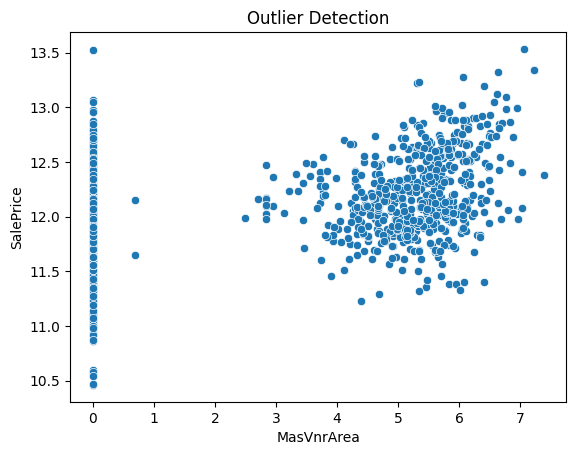

In [ ]:
# @title
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=train_df)
plt.title('Outlier Detection')
plt.show()

## ✅ 7. Feature Correlation

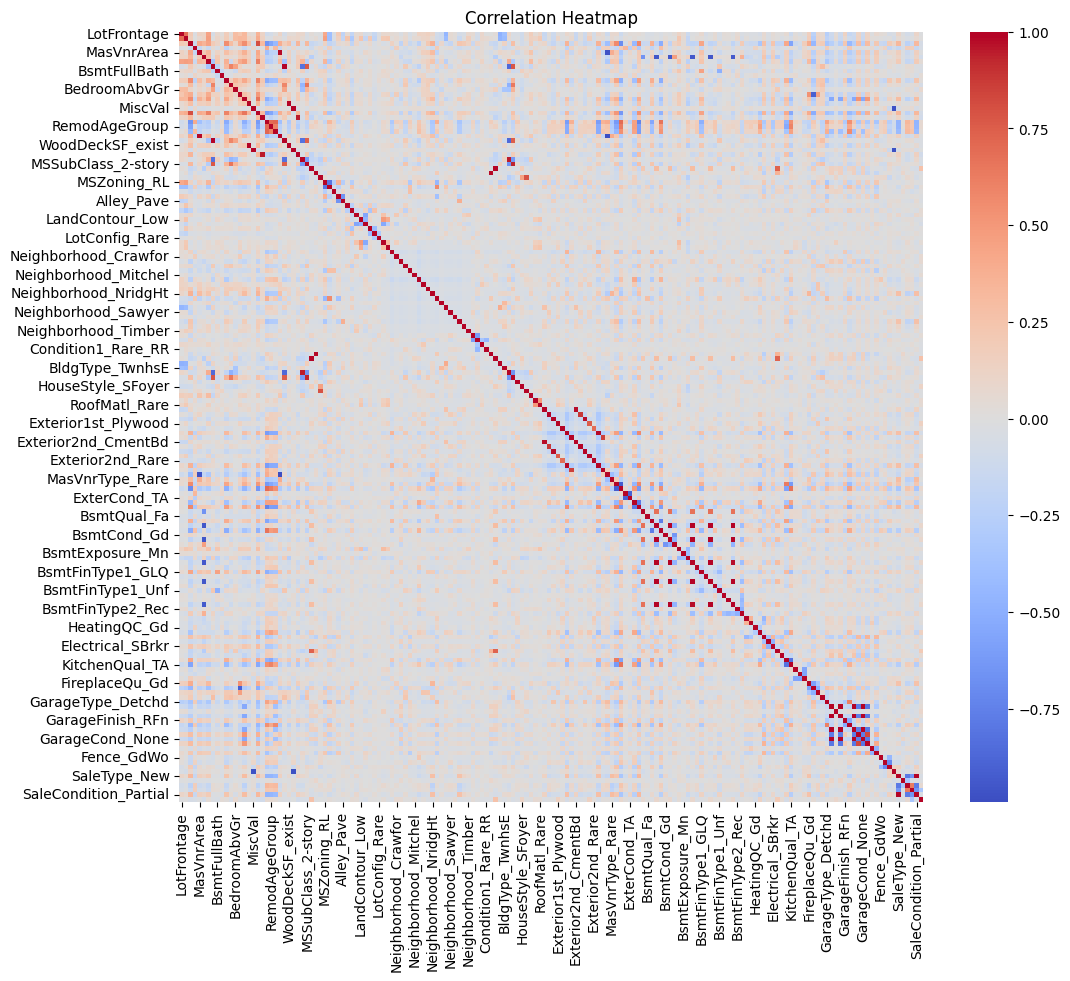

,SalePrice
SalePrice,1.000000
OverallQual,0.812788
GarageArea,0.650888
1stFlrSF,0.608955
FullBath,0.602009
Foundation_PConc,0.530840
ExterQual_Gd,0.509675
Fireplaces,0.492406
BsmtFinType1_GLQ,0.440764
MasVnrArea,0.413318


In [ ]:
numeric_df = train_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

In [ ]:
high_corr_pairs = corr_matrix.unstack()
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.5) & (high_corr_pairs < 1.0)]

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_pairs = high_corr_pairs.drop_duplicates().sort_values(ascending=False)

# Display the result
print(high_corr_pairs)

2ndFlrSF             2ndFlrSF_exist           0.997334
MiscVal              MiscVal_exist            0.991180
WoodDeckSF           WoodDeckSF_exist         0.987795
SaleType_New         SaleCondition_Partial    0.986819
BsmtQual_None        BsmtFinType2_None        0.986408
BsmtExposure_None    BsmtFinType1_None        0.986408
BsmtQual_None        BsmtExposure_None        0.986408
MSSubClass_family    BldgType_2fmCon          0.983395
MasVnrArea           MasVnrArea_exist         0.978372
Exterior1st_VinylSd  Exterior2nd_VinylSd      0.977525
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.974171
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.973065
BsmtExposure_None    BsmtFinType2_None        0.972981
TotalPorchSF         TotalPorchSF_exist       0.951551
MSSubClass_1-story   HouseStyle_1Story        0.945991
MSSubClass_2-story   HouseStyle_2Story        0.933502
Exterior1st_HdBoard  Exterior2nd_HdBoard      0.883271
Exterior1st_Wd Sdng  Exterior2nd_Wd Sdng      0.859244
GarageQual

In [ ]:
import numpy as np

# 1. Select numeric columns only
numeric_df = train_df.select_dtypes(include=['number'])

# 2. Compute correlation matrix (absolute values)
corr_matrix = numeric_df.corr().abs()

# 3. Create upper triangle matrix of correlations (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Find columns with correlation greater than the threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Columns to drop due to high correlation (> {threshold}):")
print(to_drop)

# 5. Drop those columns from your DataFrame
# reduced_df = numeric_df.drop(columns=to_drop)

# reduced_df now contains numeric features with reduced multicollinearity


Columns to drop due to high correlation (> 0.8):
['SalePrice', 'MasVnrArea_exist', '2ndFlrSF_exist', 'WoodDeckSF_exist', 'MiscVal_exist', 'TotalPorchSF_exist', 'MSSubClass_1-story', 'MSZoning_RM', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1Story', 'HouseStyle_2Story', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'ExterQual_TA', 'ExterCond_TA', 'BsmtQual_None', 'BsmtCond_None', 'BsmtExposure_None', 'BsmtFinType1_None', 'BsmtFinType2_None', 'KitchenQual_TA', 'FireplaceQu_None', 'GarageFinish_None', 'GarageQual_None', 'GarageCond_None', 'GarageCond_TA', 'MiscFeature_None', 'SaleCondition_Partial']


In [ ]:
high_corr_pairs

,,0
2ndFlrSF,2ndFlrSF_exist,0.997334
MiscVal,MiscVal_exist,0.991180
WoodDeckSF,WoodDeckSF_exist,0.987795
SaleType_New,SaleCondition_Partial,0.986819
BsmtQual_None,BsmtFinType2_None,0.986408
BsmtExposure_None,BsmtFinType1_None,0.986408
BsmtQual_None,BsmtExposure_None,0.986408
MSSubClass_family,BldgType_2fmCon,0.983395
MasVnrArea,MasVnrArea_exist,0.978372
Exterior1st_VinylSd,Exterior2nd_VinylSd,0.977525


In [ ]:
# drop corr > 0.8 cols to reduce multicolinearity
to_drop_cols = ['SaleCondition_Partial', 'BsmtFinType2_None', 'BsmtFinType1_None', 'BsmtExposure_None', 'BldgType_2fmCon', 'Exterior2nd_VinylSd', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'BsmtFinType2_None', 'HouseStyle_1Story', 'HouseStyle_2Story',
                'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'GarageCond_TA']

In [ ]:
train_df.drop(to_drop_cols, axis=1, inplace=True)
test_df.drop(to_drop_cols, axis=1, inplace=True)

In [ ]:
train_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_transformed_remove_high_corr.pkl")

In [ ]:
test_df.to_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_transformed_remove_high_corr.pkl")

In [ ]:
train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Rare,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Rare
0,4.189655,9.042040,7,5,5.283204,6.753438,6.753438,6.751101,1,0,2,1,3,0,548,0.000000,0.0,12.247699,4.127134,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
1,4.394449,9.169623,6,8,0.000000,7.141245,7.141245,0.000000,0,1,2,0,3,1,460,5.700444,0.0,12.109016,0.000000,5,5,5,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
2,4.234107,9.328212,7,5,5.093750,6.825460,6.825460,6.765039,1,0,2,1,3,1,608,0.000000,0.0,12.317171,3.761200,2,2,2,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
3,4.110874,9.164401,7,5,0.000000,6.629363,6.869014,6.629363,1,0,1,0,3,1,642,0.000000,0.0,11.849405,5.730100,8,5,2,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0
4,4.442651,9.565284,8,5,5.860786,7.044033,7.044033,6.960348,1,0,2,1,4,1,836,5.262690,0.0,12.429

In [ ]:
test_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Rare,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Rare,Id
0,4.394449,9.360741,5,6,0.000000,6.783325,6.799056,0.000000,0.0,0.0,1,0,2,0,730.0,4.948760,0.000000,4.795791,5,5,5,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1461
1,4.406719,9.565775,6,6,4.691348,7.192934,7.192934,0.000000,0.0,0.0,1,1,3,0,312.0,5.976351,9.433564,3.610918,6,6,6,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1462
2,4.317488,9.534668,5,5,0.000000,6.834109,6.834109,6.553933,0.0,0.0,2,1,3,1,482.0,5.361292,0.000000,3.555348,3,3,3,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1463
3,4.369448,9.208238,6,6,3.044522,6.831954,6.831954,6.520621,0.0,0.0,2,1,3,1,470.0,5.888878,0.000000,3.610918,3,3,3,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1464
4,3.784190,8.518392,8,5,0.000000,7.155396,7.155396,0.000000,0.0,0.0,2,0,2,0,50

## ✅ 8. Feature Importance (Advanced)

In [ ]:
train_df = pd.read_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/train_df_transformed_remove_high_corr.pkl")
test_df = pd.read_pickle("/content/drive/MyDrive/Kaggle/house-prices/dataset/test_df_transformed_remove_high_corr.pkl")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 153 entries, LotFrontage to SaleCondition_Rare
dtypes: float64(10), int64(140), int8(3)
memory usage: 1.7 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 153 entries, LotFrontage to Id
dtypes: float64(12), int64(138), int8(3)
memory usage: 1.7 MB


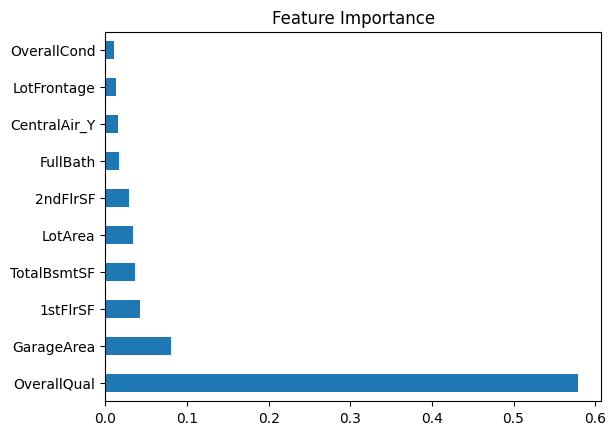

In [ ]:
# @title

X = train_df.select_dtypes(include=[np.number]).drop(['SalePrice'], axis=1).fillna(0)
y = np.log1p(train_df['SalePrice'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor().fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [ ]:
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print("Columns only in train:", only_in_train)
print("Columns only in test :", only_in_test)


Columns only in train: {'SalePrice'}
Columns only in test : {'Id'}


## Try running model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

In [ ]:
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 153 entries, LotFrontage to SaleCondition_Rare
dtypes: float64(10), int64(140), int8(3)
memory usage: 1.7 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 153 entries, LotFrontage to Id
dtypes: float64(12), int64(138), int8(3)
memory usage: 1.7 MB


### linear regression

In [ ]:

kf = KFold(n_splits=5)  # 5-fold cross-validation

linModel = LinearRegression()

enet = ElasticNet(alpha=0.1, l1_ratio=0.5)

lin_score = []
enet_score = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # linear Model
    linModel.fit(X_train, y_train)

    y_pred_log = linModel.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    lin_score.append(score)

    # ElasticNet model
    enet.fit(X_train, y_train)

    y_pred_log = enet.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    enet_score.append(score)

print(f"linModel R² Score: {lin_score}")
print(f"linModel Average R² Score: {np.mean(lin_score):.4f}")

print(f"enetModel (alpha = 0.1, l1_ratio = 0.5) R² Score: {enet_score}")
print(f"enetModel (alpha = 0.1, l1_ratio = 0.5) Average R² Score: {np.mean(enet_score):.4f}")

linModel R² Score: [0.8932313522991288, 0.8437705597471392, 0.9146997910013185, 0.9186456252244969, 0.6641646542451416]
linModel Average R² Score: 0.8469
enetModel (alpha = 0.1, l1_ratio = 0.5) R² Score: [0.7415365644647525, 0.7039861195634742, 0.6843194174521563, 0.7169869562886639, 0.5695859751426635]
enetModel (alpha = 0.1, l1_ratio = 0.5) Average R² Score: 0.6833


linear model
- best = standard linear regression, linModel
- regularization worsen the performance, enet

## tree models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [ ]:
kf = KFold(n_splits=5)  # 5-fold cross-validation

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=-1)


rf_score = []
gb_score = []
xgb_score = []
lgbm_score = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # RandomForest Model
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    y_pred_log = rf.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    rf_score.append(score)

    # GradientBoostingRegressor model
    gb.fit(X_train, y_train)

    y_pred_log = gb.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    gb_score.append(score)

    # XGBRegressor model
    xgb.fit(X_train, y_train)

    y_pred_log = xgb.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    xgb_score.append(score)

    # LGBMRegressor model
    lgbm.fit(X_train, y_train)

    y_pred_log = lgbm.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    score = r2_score(y_true, y_pred)
    lgbm_score.append(score)

print('Random Forest')
print(' n_estimators=100')
print(f"R² Score: {rf_score}")
print(f"Average R² Score: {np.mean(rf_score):.4f}")
print('\n')
print('GradientBoostingRegressor')
print(' n_estimators=100, learning_rate=0.1, max_depth=3')
print(f"R² Score: {gb_score}")
print(f"Average R² Score: {np.mean(gb_score):.4f}")
print('\n')
print('XGBRegressor')
print(' n_estimators=100, learning_rate=0.1, max_depth=3')
print(f"R² Score: {xgb_score}")
print(f"Average R² Score: {np.mean(xgb_score):.4f}")
print('\n')
print('LGBMRegressor')
print(' n_estimators=100, learning_rate=0.1, max_depth=3')
print(f"R² Score: {lgbm_score}")
print(f"Average R² Score: {np.mean(lgbm_score):.4f}")

Random Forest
 n_estimators=100
R² Score: [0.863239987268666, 0.8266310417774463, 0.8441294499436433, 0.8722026151890677, 0.8034227284869344]
Average R² Score: 0.8419


GradientBoostingRegressor
 n_estimators=100, learning_rate=0.1, max_depth=3
R² Score: [0.9019562411870544, 0.8044619319270572, 0.8838655245660285, 0.9064311061079774, 0.8767183765731705]
Average R² Score: 0.8747


XGBRegressor
 n_estimators=100, learning_rate=0.1, max_depth=3
R² Score: [0.898441063365412, 0.8246245960092153, 0.8580760749838551, 0.9018144640970226, 0.8578499609983775]
Average R² Score: 0.8682


LGBMRegressor
 n_estimators=100, learning_rate=0.1, max_depth=3
R² Score: [0.8987413670313908, 0.8377026239872315, 0.8571006170137763, 0.8874781660786897, 0.8186208397925262]
Average R² Score: 0.8599


### all tree models are better than linear model except RandomForest -> remove random forest, tune the rest

#### GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [ ]:
# Custom scorer to compute R2 in original scale
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

In [ ]:
r2_exp_scorer = make_scorer(r2_exp, greater_is_better=True)


In [ ]:
def grid_search_hyperparams(model, param_grid, X, y):
  # Setup GridSearchCV with 5-fold CV
  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid,
      scoring=r2_exp_scorer,
      cv=5,
      n_jobs=-1,  # parallelize if possible
      verbose=2
  )

  # Fit grid search on your data
  grid_search.fit(X, y)

  # Best params and best score
  print("Best params:", grid_search.best_params_)
  print(f"Best average R² (original scale): {grid_search.best_score_:.4f}")


In [ ]:
# GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search_hyperparams(model, param_grid, X, y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best average R² (original scale): 0.8811


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

def r_grid_search_hyperparams(model, param_dist, X, y):

  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      n_iter=30,  # number of parameter settings sampled
      scoring=r2_exp_scorer,  # your custom scorer with expm1
      cv=5,
      verbose=2,
      random_state=42,
      n_jobs=-1
  )

  random_search.fit(X, y)
  print(random_search.best_params_)
  print(f"Best score: {random_search.best_score_:.4f}")


In [ ]:
# Define model
model = XGBRegressor(random_state=42)

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': stats.uniform(0.01, 0.1),  # sample float between 0.01 and 0.11
    'max_depth': [3, 5, 7],
    'subsample': stats.uniform(0.7, 0.3),  # 0.7 to 1.0
    'colsample_bytree': stats.uniform(0.7, 0.3),
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}


r_grid_search_hyperparams(model, param_dist_xgb, X, y)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'colsample_bytree': np.float64(0.7932946965146986), 'gamma': 0, 'learning_rate': np.float64(0.0829606178338064), 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': np.float64(0.8148780624261369)}
Best score: 0.8614


In [ ]:
from scipy.stats import randint, uniform
# Define model
model = LGBMRegressor(random_state=42)

param_dist_lgbm = {
    'n_estimators': randint(50, 200),              # number of boosting rounds
    'learning_rate': uniform(0.01, 0.1),           # 0.01 to 0.11
    'max_depth': randint(3, 10),                   # depth of tree
    'num_leaves': randint(20, 50),                 # <= 2^max_depth, controls complexity
    'min_child_samples': randint(10, 30),          # min data in one leaf
    'subsample': uniform(0.7, 0.3),                # row sample ratio (0.7 to 1.0)
    'colsample_bytree': uniform(0.7, 0.3),         # feature sample ratio (0.7 to 1.0)
    'reg_alpha': uniform(0.0, 1.0),                # L1 regularization
    'reg_lambda': uniform(0.0, 1.0),               # L2 regularization
}


r_grid_search_hyperparams(model, param_dist_lgbm, X, y)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'colsample_bytree': np.float64(0.810334939815776), 'learning_rate': np.float64(0.07323058305935795), 'max_depth': 8, 'min_child_samples': 20, 'n_estimators': 193, 'num_leaves': 20, 'reg_alpha': np.float64(0.15071754396542947), 'reg_lambda': np.float64(0.5081987767407187), 'subsample': np.float64(0.9087438420372645)}
Best score: 0.8739


## Best model = GradientBoostingRegressor
best param: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
gb_best = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
gb_best.fit(X, y)
y_pred_log = gb_best.predict(X)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y)

score = r2_score(y_true, y_pred)

print(f"R² Score: {score:.4f}")

R² Score: 0.9688


## predict test data

In [ ]:
train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,SalePrice,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Rare,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Rare
0,4.189655,9.042040,7,5,5.283204,6.753438,6.753438,6.751101,1,0,2,1,3,0,548,0.000000,0.0,12.247699,4.127134,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
1,4.394449,9.169623,6,8,0.000000,7.141245,7.141245,0.000000,0,1,2,0,3,1,460,5.700444,0.0,12.109016,0.000000,5,5,5,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
2,4.234107,9.328212,7,5,5.093750,6.825460,6.825460,6.765039,1,0,2,1,3,1,608,0.000000,0.0,12.317171,3.761200,2,2,2,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
3,4.110874,9.164401,7,5,0.000000,6.629363,6.869014,6.629363,1,0,1,0,3,1,642,0.000000,0.0,11.849405,5.730100,8,5,2,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0
4,4.442651,9.565284,8,5,5.860786,7.044033,7.044033,6.960348,1,0,2,1,4,1,836,5.262690,0.0,12.429

In [ ]:
test_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,MiscVal,TotalPorchSF,Age_group,RemodAgeGroup,GarageAgeGroup,MasVnrArea_exist,2ndFlrSF_exist,WoodDeckSF_exist,MiscVal_exist,TotalPorchSF_exist,MSSubClass_1-story,MSSubClass_2-story,MSSubClass_duplex,MSSubClass_family,MSSubClass_split,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Pave,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,LandSlope_Rare,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_high,Neighborhood_Rare_low,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare_Pos,Condition1_Rare_RR,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Rare,MasVnrType_None,MasVnrType_Rare,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Rare,Electrical_SBrkr,KitchenAbvGr_2+,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Rare,Id
0,4.394449,9.360741,5,6,0.000000,6.783325,6.799056,0.000000,0.0,0.0,1,0,2,0,730.0,4.948760,0.000000,4.795791,5,5,5,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1461
1,4.406719,9.565775,6,6,4.691348,7.192934,7.192934,0.000000,0.0,0.0,1,1,3,0,312.0,5.976351,9.433564,3.610918,6,6,6,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1462
2,4.317488,9.534668,5,5,0.000000,6.834109,6.834109,6.553933,0.0,0.0,2,1,3,1,482.0,5.361292,0.000000,3.555348,3,3,3,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1463
3,4.369448,9.208238,6,6,3.044522,6.831954,6.831954,6.520621,0.0,0.0,2,1,3,1,470.0,5.888878,0.000000,3.610918,3,3,3,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1464
4,3.784190,8.518392,8,5,0.000000,7.155396,7.155396,0.000000,0.0,0.0,2,0,2,0,50

In [ ]:
test_id = test_df['Id']


In [ ]:
test_df.drop('Id', axis=1, inplace=True)

In [ ]:
expected_cols = [col for col in train_df.drop('SalePrice', axis=1).columns]
print(test_df.columns.equals(pd.Index(expected_cols)))


True


In [ ]:
missing = test_df.isna().sum()
missing = missing[missing > 0]
print(missing)

Series([], dtype: int64)


In [ ]:
y_pred = gb_best.predict(X=test_df)
y_pred = np.expm1(y_pred)

In [ ]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})

In [ ]:
submission.head()

,Id,SalePrice
0,1461,127167.951040
1,1462,152450.530284
2,1463,180635.624904
3,1464,182996.720391
4,1465,197743.531833


In [ ]:
submission.to_csv('/content/drive/MyDrive/Kaggle/house-prices/submission_gb_1.csv', index=False)

## Try stacking model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': 150,
    'learning_rate': 0.1,
    'max_depth': 3,
    'random_state': 42,
}

xgb_params = {
    'colsample_bytree': np.float64(0.7932946965146986),
    'gamma': 0,
    'learning_rate': np.float64(0.0829606178338064),
    'max_depth': 5,
    'n_estimators': 150,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'subsample': np.float64(0.8148780624261369),
    'random_state': 42
}

lgbm_params = {
    'colsample_bytree': 0.810334939815776,
    'learning_rate': 0.07323058305935795,
    'max_depth': 8,
    'min_child_samples': 20,
    'n_estimators': 193,
    'num_leaves': 20,
    'reg_alpha': 0.15071754396542947,
    'reg_lambda': 0.5081987767407187,
    'subsample': 0.9087438420372645,
    'verbose': -1,
    'random_state': 42
}

# Define base models
base_estimators = [
    ('gb', GradientBoostingRegressor(**gb_params)),
    # ('xgb', XGBRegressor(**xgb_params)),
    # ('lgb', LGBMRegressor(**lgbm_params)),
    ('linear', LinearRegression())
]

# Stacking model with Ridge as final estimator
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    verbosity=0
  )
)

# Grid search over the final estimator
param_grid = {
    'final_estimator__alpha': [0.1, 1.0, 10.0]
}

grid = GridSearchCV(stack, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid.fit(X, y)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .........................final_estimator__alpha=0.1; total time=   6.1s
[CV] END .........................final_estimator__alpha=0.1; total time=   7.4s
[CV] END .........................final_estimator__alpha=0.1; total time=   6.1s
[CV] END .........................final_estimator__alpha=0.1; total time=   7.4s
[CV] END .........................final_estimator__alpha=0.1; total time=   6.0s
[CV] END .........................final_estimator__alpha=1.0; total time=   7.3s
[CV] END .........................final_estimator__alpha=1.0; total time=   6.2s
[CV] END .........................final_estimator__alpha=1.0; total time=   7.9s
[CV] END .........................final_estimator__alpha=1.0; total time=   6.2s
[CV] END .........................final_estimator__alpha=1.0; total time=   7.5s
[CV] END ........................final_estimator__alpha=10.0; total time=   6.4s
[CV] END ........................final_estimator_

GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('gb',
                                                      GradientBoostingRegressor(n_estimators=150,
                                                                                random_state=42)),
                                                     ('linear',
                                                      LinearRegression())],
                                         final_estimator=XGBRegressor(base_score=None,
                                                                      booster=None,
                                                                      callbacks=None,
                                                                      colsample_bylevel=None,
                                                                      colsample_bynode=None,
                                                                      colsample_bytree=None,
                                                                      device=None,
                                                                      early_stopping_rounds=None,
                                                                      enable_categori...
                                                                      max_bin=None,
                                                                      max_cat_threshold=None,
                                                                      max_cat_to_onehot=None,
                                                                      max_delta_step=None,
                                                                      max_depth=3,
                                                                      max_leaves=None,
                                                                      min_child_weight=None,
                                                                      missing=nan,
                                                                      monotone_constraints=None,
                                                                      multi_strategy=None,
                                                                      n_estimators=100,
                                                                      n_jobs=None,
                                                                      num_parallel_tree=None,
                                                                      random_state=42, ...)),
             param_grid={'final_estimator__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
# Best model
best_stack = grid.best_estimator_
# pred = best_stack.predict(X_test)


In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import numpy as np

# Custom RMSE scorer (in original scale)
def rmse_exp(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

# Custom R² scorer (in original scale)
def r2_exp(y_true, y_pred):
    return r2_score(np.expm1(y_true), np.expm1(y_pred))

# Create scorers
scorers = {
    'rmse': make_scorer(rmse_exp, greater_is_better=False),
    'r2': make_scorer(r2_exp)
}

# Run cross-validation
results = cross_validate(best_stack, X, y, scoring=scorers, cv=5)

# Print average scores
print("Average RMSE:", -results['test_rmse'].mean())
print("Average R²:", results['test_r2'].mean())


Average RMSE: 26722.713101348938
Average R²: 0.8859013375167782


In [ ]:
y_pred = best_stack.predict(X=test_df)
y_pred = np.expm1(y_pred)

In [ ]:
submission2 = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})

In [ ]:
submission2.head()

,Id,SalePrice
0,1461,119141.101562
1,1462,164137.015625
2,1463,174389.562500
3,1464,191348.281250
4,1465,202353.671875


In [ ]:
submission2.to_csv('/content/drive/MyDrive/Kaggle/house-prices/submission_stack_1.csv', index=False)